<a href="https://colab.research.google.com/github/smruthyunjaya05/MLE/blob/main/Polynomial_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [3]:
# Load the California housing dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [4]:
# For simplicity, we'll use just one feature for polynomial regression
# Here, we'll use 'MedInc' (Median Income) as the feature
X = X[:, 0].reshape(-1, 1)  # 'MedInc' feature

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Polynomial Regression (degree 2 for demonstration)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

In [7]:
# Evaluation Metrics
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

In [8]:
# Print Evaluation Metrics
print("Polynomial Regression")
print(f"Mean Squared Error: {mse_poly:.4f}")
print(f"R-squared: {r2_poly:.4f}")

Polynomial Regression
Mean Squared Error: 0.7033
R-squared: 0.4633


In [9]:
# Visualization
plt.figure(figsize=(12, 6))


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

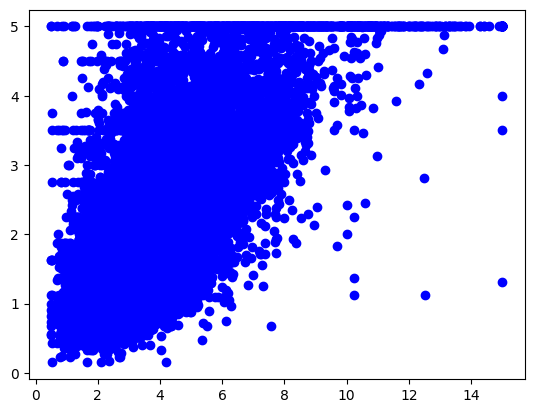

In [10]:
# Scatter plot of the original data
plt.scatter(X, y, color='blue', label='Actual Housing Prices')

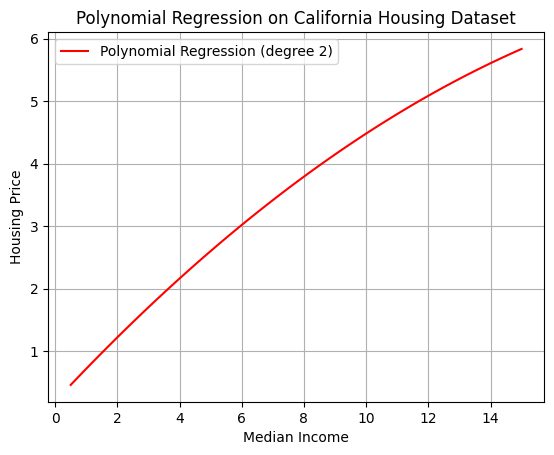

In [12]:
# Plot polynomial regression results
X_range = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1, 1)
X_range_poly = poly.transform(X_range)
y_pred_range = poly_model.predict(X_range_poly)
plt.plot(X_range, y_pred_range, color='red', label='Polynomial Regression (degree 2)')

plt.xlabel('Median Income')
plt.ylabel('Housing Price')
plt.title('Polynomial Regression on California Housing Dataset')
plt.legend()
plt.grid(True)
plt.show()